# This notebook creates an image of the mandelbrot set
___

* video talking about the mandelbrot set by vsauce - https://www.youtube.com/watch?v=MwjsO6aniig <br>

![](./Images/test500.png)

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

## Defining class to represent complex numbers
Field variables: <br>
  * real - the real part of the complex number <br>
  * i    - the imaginary part of the complex number <br>
    
Class functions: <br>
  * add - adds another complex number to this number<br>
  * mul - multiplies this complex number by another complex number<br>
  * mag - returns the magnitude of the complex number (distance from origin)<br>

In [2]:
class Complex():
    def __init__(self, Real, i):
        
        self.real = Real
        self.i = i
        
    def add(self, num):
        self.real += num.real
        self.i += num.i
            
    def mul(self, num):
        real = (self.real * num.real) - (self.i * num.i)
        i = (self.real * num.i) + (self.i * num.real)
        self.real = real
        self.i = i
        
    def mag(self):
        return np.sqrt((self.i**2) + (self.real**2))

In [3]:
# helper functions

def saveImage(name, array, c=None):
    matplotlib.image.imsave(name + ".png", array, cmap=c)
    
def readImage(path):
    return plt.imread(path)

## Defining the function that generates the mandelbrot image

The idea here is to take a region of the complex plane where the mandelbrot set is present and make a grid covering it, then for every pixel in the grid check if it is a member of the mandelbrot set. <br>
To know how to check if a number is a member of the mandelbrot set visit - https://math.stackexchange.com/questions/558138/simplest-way-to-determine-if-a-number-is-a-member-of-the-mandelbrot-set <br>

arguments:
  * im_lower - lower imaginary bound
  * im_higher - higher imaginary bound
  * real_lower - lower real bound
  * real_higher - higher real bound
  * real_pixels - amount of pixels across real axis
  * im_pixels - amount of pixels across imaginary axis
  * maxiter - max amount of iterations to check if a number is a member of the set
  * plot - wether or not to plot the image when done
 
returns:
  * the image of the mandelbrot set

In [4]:
def makeMandelbrot(im_lower, im_higher, real_lower, real_higher, real_pixels, im_pixels, maxiter, plot=False):

    real_points = np.linspace(real_lower, real_higher, real_pixels) # taking equally spaced points across real axis
    im_points = np.linspace(im_lower, im_higher, im_pixels) # taking equally spaced points across imaginary axis
    
    arr = np.ndarray((len(real_points), len(im_points)), dtype=list) # making array representing complex plane dots (i.e numbers)
    img = np.zeros((len(real_points), len(im_points))) # making the image
    
    for index1, i in enumerate(real_points):
        for index2, j in enumerate(im_points):
            arr[index1][index2] = [i, j] # filling arr with coordinates of complex numbers
    
    for index1, row in enumerate(arr):
        for index2, num in enumerate(row):
            z = Complex(arr[index1][index2][0], arr[index1][index2][1]) # initializing the complex number cooresponding with the spot on the image
            start_num = Complex(0, 0) 
            for i in range(maxiter):
                start_num.mul(start_num)
                start_num.add(z)
                if start_num.mag() > 2:
                    img[index1][index2] = 255
                    break
                    
    if plot:
        plt.imshow(img, cmap='gray')
                    
    return img
    

## Defining easier to use function

* boundries of the mandelbrot set already built in and don't have to be specified
* automatically adjusts amount of pixels to keep the aspect ratio of the image 

arguments:
  * pixels - amount of pixels across real axis, amount of pixels on imaginary axis are adjusted to keep aspect ratio 
  * iters - amount of iterations while checking if the number is a member of the set
  
returns:
  * Image of mandelbrot set

In [32]:
def EasyMandelbrot(pixels, iters=75):
    return makeMandelbrot(-1, 1, -2, 0.6, pixels, int(0.76*pixels), iters, True)

## Generating images of the mandelbrot set
___

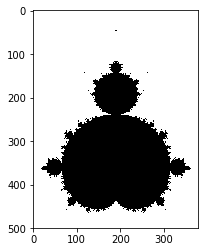

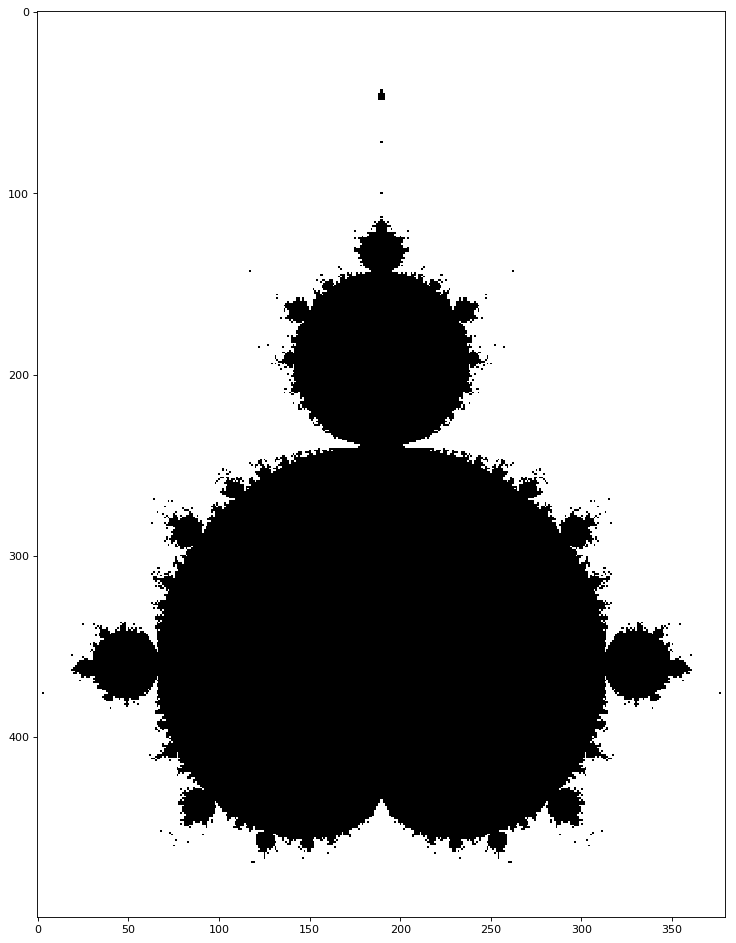

In [37]:
img = EasyMandelbrot(500, 50) # calling EasyMandelbrot with 500 pixels and 50 iterations
plt.figure(num=None, figsize=(15, 15), dpi=80, facecolor='w', edgecolor='k') 
plt.imshow(img, cmap='gray') # potting the image

saveImage("test500", img, c="gray") # saving image